In [1]:
# libraries used

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import datetime
import math

%matplotlib inline

# needed for treemap graphic
!pip install squarify 
import squarify

!pip install pyecharts
from pyecharts.charts import Pie
from pyecharts import options as opt

print("loaded libraries")

     |████████████████████████████████| 143kB 6.5MB/s 
     |████████████████████████████████| 133kB 8.4MB/s 
loaded libraries


In [2]:
# load up csv files

github_url = "https://raw.githubusercontent.com/werntzp/hockey-stats/master/"

df_games = pd.read_csv(github_url + "games.csv") 
df_shots = pd.read_csv(github_url + "shots.csv") 
df_goals = pd.read_csv(github_url + "goals.csv") 
#df_goals_assists = pd.read_csv(github_url + "goals_assists.csv")
df_periods = pd.read_csv(github_url + "periods.csv")
df_penalties = pd.read_csv(github_url + "penalties.csv") 
df_points = pd.read_csv(github_url + "points.csv")
df_player_stats = pd.read_csv(github_url + "xtreme_2020-21_player_stats.csv")

print("loaded csv files")


loaded csv files


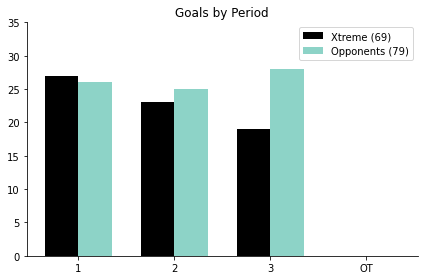

In [3]:
# bar chart with goals per period

p1xg = df_goals[(df_goals.team == "a") & (df_goals.period == 1)].shape[0]
p2xg = df_goals[(df_goals.team == "a") & (df_goals.period == 2)].shape[0]
p3xg = df_goals[(df_goals.team == "a") & (df_goals.period == 3)].shape[0]
p4xg = df_goals[(df_goals.team == "a") & (df_goals.period == 4)].shape[0]

p1og = df_goals[(df_goals.team == "o") & (df_goals.period == 1)].shape[0]
p2og = df_goals[(df_goals.team == "o") & (df_goals.period == 2)].shape[0]
p3og = df_goals[(df_goals.team == "o") & (df_goals.period == 3)].shape[0]
p4og = df_goals[(df_goals.team == "o") & (df_goals.period == 4)].shape[0]

labels = ['1', '2', '3', 'OT']
xtreme = [p1xg, p2xg, p3xg, p4xg]
opponent = [p1og, p2og, p3og, p4og]

x_label = "Xtreme (" + str(p1xg + p2xg + p3xg + p4xg) + ")"
o_label = "Opponents (" + str(p1og + p2og + p3og + p4og) + ")"

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xtreme, width, label=x_label, color='black')
rects2 = ax.bar(x + width/2, opponent, width, label=o_label, color='#8dd3c7')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Goals by Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

fig.tight_layout()
plt.yticks(np.arange(0, 40, 5))

plt.show()

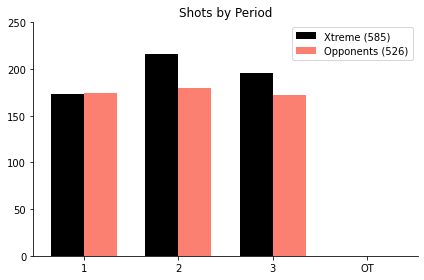

In [4]:
# bar chart with shots per period

p1xs = df_shots['ashburn_p1'].sum()
p2xs = df_shots['ashburn_p2'].sum()
p3xs = df_shots['ashburn_p3'].sum()
p4xs = df_shots['ashburn_ot'].sum()

p1os = df_shots['opp_p1'].sum()
p2os = df_shots['opp_p2'].sum()
p3os = df_shots['opp_p3'].sum()
p4os = df_shots['opp_ot'].sum()

labels = ['1', '2', '3', 'OT']
xtreme = [p1xs, p2xs, p3xs, p4xs]
opponent = [p1os, p2os, p3os, p4os]

x_label = "Xtreme (" + str(p1xs + p2xs + p3xs + p4xs) + ")"
o_label = "Opponents (" + str(p1os + p2os + p3os + p4os) + ")"

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xtreme, width, label=x_label, color='black')
rects2 = ax.bar(x + width/2, opponent, width, label=o_label, color='#fb8072')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Shots by Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

fig.tight_layout()
plt.yticks(np.arange(0, 300, 50))

plt.show()


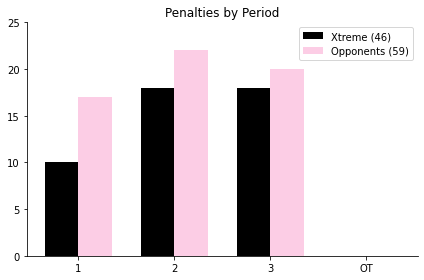

In [5]:
# bar chart comparing xtreme and opponent penalties by period

p1xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 1)].shape[0]
p2xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 2)].shape[0]
p3xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 3)].shape[0]
p4xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 4)].shape[0]

p1op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 1)].shape[0]
p2op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 2)].shape[0]
p3op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 3)].shape[0]
p4op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 4)].shape[0]

labels = ['1', '2', '3', 'OT']
xtreme = [p1xp, p2xp, p3xp, p4xp]
opponent = [p1op, p2op, p3op, p4op]

x_label = "Xtreme (" + str(p1xp + p2xp + p3xp + p4xp) + ")"
o_label = "Opponents (" + str(p1op + p2op + p3op + p4op) + ")"

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xtreme, width, label=x_label, color='black')
rects2 = ax.bar(x + width/2, opponent, width, label=o_label, color='#fccde5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Penalties by Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

fig.tight_layout()
plt.yticks(np.arange(0, 30, 5))

plt.show()

In [7]:
# treemap with penalty types 

fig = go.Figure()

x = 0.
y = 0.
width = 100.
height = 100.

# get unique list of xtreme penalty types
dfx = df_penalties[(df_penalties.team == "a")]
arr = dfx.type.unique()

p_values = []
p_labels = []

# loop through names and count up number of times they occured
for p in arr:
  c = dfx[(dfx.type == p)].shape[0]
  p_values.append(c)
  p_labels.append(p + " (" + str(c) + ")")

normed = squarify.normalize_sizes(p_values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['rgb(43,140,190)','rgb(141,211,199)','rgb(255,255,179)','rgb(190,186,218)','rgb(251,128,114)','rgb(128,177,211)','rgb(253,180,98)','rgb(179,222,105)','rgb(252,205,229)','rgb(217,217,217)','rgb(188,128,189)','rgb(204,235,197)','rgb(44,162,95)', 'rgb(299,245,249)','rgb(136,86,167)']

# other colors if have more than 8 penalty types ... , , 

shapes = []
annotations = []
counter = 0

for r, val, color, lbl in zip(rects, p_values, color_brewer, p_labels):
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x']+r['dx'],
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = lbl.replace(' ', '\r\n'), 
            showarrow = False
        )
    )

# For hover text
fig.add_trace(go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ],
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in p_values ],
    mode = 'text',
))

fig.update_layout(
    height=700,
    width=700,
    xaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
    yaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    title=go.layout.Title(
        text="Xtreme Penalty Types",
        xref="paper",
        x=0
    )
)

fig.show()

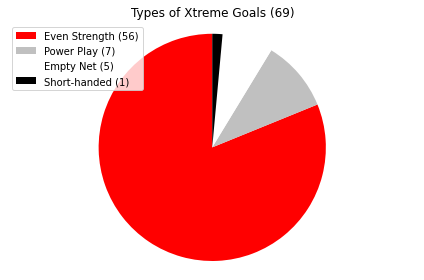

In [10]:
# Pie chart with goal types

# dictionary with goal types 
goal_types = {"en": "Empty Net", "es": "Even Strength", "pp": "Power Play", "ps": "Penalty shot", "sh": "Short-handed" }

# get unique list of goal types 
dfx = df_goals[(df_goals.team == "a")]
arr = dfx.type.unique()

g_values = []
g_labels = []

for g in arr:
  c = dfx[(dfx.type == g)].shape[0]
  g_values.append(c)
  g_labels.append(goal_types[g] + " (" + str(c) + ")")

#colors
colors = ['#ff0000','#c0c0c0','#ffffff','#000000']

fig1, ax1 = plt.subplots()
#patches, texts, autotexts = ax1.pie(g_values, colors = colors, autopct='%1.0f%%', pctdistance=1.08, startangle=90)
patches, texts = ax1.pie(g_values, colors = colors, pctdistance=1.08, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, g_labels, loc="best")
ax1.axis('equal')  
ax1.set_title('Types of Xtreme Goals (' + str(len(dfx.index)) + ')')
plt.tight_layout()
plt.show()

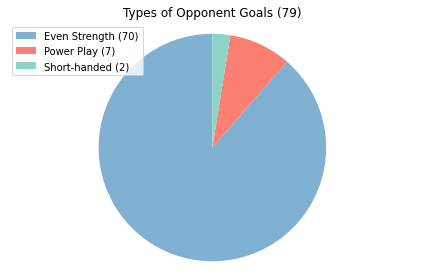

In [11]:
# Pie chart with goal types

# dictionary with goal types 
#goal_types = {"en": "Empty Net", "es": "Even Strength", "pp": "Power Play", "ps": "Penalty shot", "sh": "Short-handed" }

# get unique list of goal types 
dfx = df_goals[(df_goals.team == "o")]
arr = dfx.type.unique()

g_values = []
g_labels = []

for g in arr:
  c = dfx[(dfx.type == g)].shape[0]
  g_values.append(c)
  g_labels.append(goal_types[g] + " (" + str(c) + ")")

#colors
colors = ['#80b1d3','#fb8072','#8dd3c7','#fccde5']

fig1, ax1 = plt.subplots()
#patches, texts, autotexts = ax1.pie(g_values, colors = colors, autopct='%1.0f%%', pctdistance=1.08, startangle=90)
patches, texts = ax1.pie(g_values, colors = colors, pctdistance=1.08, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, g_labels, loc="best")
ax1.axis('equal')  
ax1.set_title('Types of Opponent Goals (' + str(len(dfx.index)) + ')')
plt.tight_layout()
plt.show()

In [12]:
# calculate how many times Xtreme scored first 

dfx = pd.DataFrame(columns=["game",	"team",	"period",	"time",	"type"])

num_games = df_games.shape[0]

# build dataframe where xtreme scored first 
for g in range(1,num_games+1):
    t = df_goals[(df_goals.game == g)].head(1)
    dfx = pd.concat([t, dfx[:]])

# loop through it to get their record 
x_win = 0 
x_loss = 0 
x_tie = 0 

dft = dfx[(dfx.team == "a")]

for idx in dft.index:
    # for each game, determine if Xtreme won or lost
    g = dft["game"][idx]
    # go get score for each game 
    if ((df_games[(df_games.game == g)].axscore.iloc[0]) > (df_games[(df_games.game == g)].oppscore.iloc[0])):
      x_win = x_win + 1
    elif ((df_games[(df_games.game == g)].axscore.iloc[0]) < (df_games[(df_games.game == g)].oppscore.iloc[0])):
      x_loss = x_loss + 1
    else: 
      x_tie = x_tie + 1

print("<b>" +  str(x_win) + "-" + str(x_loss) + "-" + str(x_tie) + "</b> when scoring first.")


<b>8-4-1</b> when scoring first.


In [13]:
# calculate power play percentage (calculated by dividing power play goals by power play opportunities)

ppg = df_goals[(df_goals.team == "a") & (df_goals.type == "pp")].shape[0]
ppo = df_penalties[(df_penalties.team == "o")].shape[0]
pp = '{0:.0f}'.format((ppg / ppo * 100))
print("Power play percentage: <b>" + str(pp) + "%</b>, ")


Power play percentage: <b>12%</b>, 


In [14]:
# calculate penalty kill percentage (calculated by subtracting power play goals against from power 
#play opportunities against, then dividing by power play opportunities against.)

ppg = df_goals[(df_goals.team == "o") & (df_goals.type == "pp")].shape[0]
ppo = df_penalties[(df_penalties.team == "a")].shape[0]
pp = '{0:.0f}'.format(((ppo - ppg) / ppo * 100))
print("penalty kill percentage: <b>" + str(pp) + "%</b>.")


penalty kill percentage: <b>85%</b>.


In [15]:
# calculate average shots per game (xtreme and opponents) 

num_games = df_games.shape[0]

x_shots = (df_shots['ashburn_p1'].sum() + df_shots['ashburn_p2'].sum() + 
           df_shots['ashburn_p3'].sum() + df_shots['ashburn_ot'].sum())

o_shots = (df_shots['opp_p1'].sum() + df_shots['opp_p2'].sum() + 
           df_shots['opp_p3'].sum() + df_shots['opp_ot'].sum())

x_avg_shots = '{0:.0f}'.format(x_shots / num_games * 1) # round to whole number .0f
o_avg_shots = '{0:.0f}'.format(o_shots / num_games * 1) # round to whole number .0f

print("Averaging <b>" + str(x_avg_shots) + "</b> shots per game while opponents average <b>" +
      str(o_avg_shots) + "</b>.")

Averaging <b>25</b> shots per game while opponents average <b>23</b>.


In [16]:
# what is Xtreme record when getting over x shots?
target_shots = 30
x_win = 0 
x_loss = 0 
x_tie = 0 

# iterate through shots table 
for idx in df_shots.index:
  # total up the shots
  g = df_shots['game'][idx]
  shots = df_shots["ashburn_p1"][idx] + df_shots["ashburn_p2"][idx] + df_shots["ashburn_p3"][idx] + df_shots["ashburn_ot"][idx]
  
  # over?
  if (shots >= target_shots):
    # print(g, shots)
    # get the game and see if Xtreme won or lost
    axscore = df_games[(df_games.game == g)].axscore.iloc[0]
    oppscore = df_games[(df_games.game == g)].oppscore.iloc[0]
    if (axscore > oppscore):
      x_win = x_win + 1
    elif (axscore < oppscore):
      x_loss = x_loss + 1
    else:
      x_tie = x_tie + 1
  
# results? 
print("<b>" + str(x_win) + "-" + str(x_loss) + "-" + str(x_tie) + "</b> when getting " + 
      str(target_shots) + " or more shots in a game.")


<b>5-0-0</b> when getting 30 or more shots in a game.


In [17]:
# calculate how many periods xtreme have scored in 

num_games = df_games.shape[0]

periods_scored = 0 
for g in range(1,num_games+1): 
  dfx = df_goals[(df_goals.game == g) & (df_goals.team == "a")]
  periods = dfx["period"].unique().size
  periods_scored = periods_scored + periods

# count # periods where > 0 
total_periods = 0 
for g in range(1,num_games+1): 
  for p in range(1,5):
    period_num = "p" + str(p) + "_length"
    period_length = df_periods.loc[df_periods.game == g, period_num].iloc[0]
    if (period_length > 0):
      total_periods = total_periods + 1

ps = '{0:.0f}'.format(periods_scored / total_periods * 100)

print("Scored in <b>" + str(periods_scored) + "</b> out of <b>" + str(total_periods) + "</b> periods (" + 
      str(ps) + "%).")


Scored in <b>43</b> out of <b>69</b> periods (62%).


In [18]:
# calculate when we give up a goal within 1 minute or 2 of scoring one 
# find an xtreme goal, see if next one is opponent, then subtract time? 

# use a counter
ctr = 0 

# use one minute as threshold
threshold = datetime.timedelta(minutes=1)

# get all xtreme goals 
dfx = df_goals[(df_goals.team == "a")]

# loop through each one
for x in range(1, dfx.shape[0]+1):
    try: 
        # current goal is ashburn
        curr_goal = dfx.iloc[x]
        # next goal is whatever the next one is 
        next_goal = df_goals.iloc[curr_goal.name+1]
        # need to verify next goal occured in the same game, same period, and was scored by opponet
        if ((next_goal[0] == curr_goal[0]) & (next_goal[1] == "o") & (next_goal[2] == curr_goal[2])):
            # now, grab time of ashburn goal and opponent goal 
            [x1_min, x1_sec] = [int(x) for x in curr_goal[3].split(':')]
            a_goal_time = datetime.timedelta(minutes=x1_min, seconds=x1_sec)
            [x2_min, x2_sec] = [int(x) for x in next_goal[3].split(':')]
            o_goal_time = datetime.timedelta(minutes=x2_min, seconds=x2_sec)
            # subtract to get time differential and see if below the threshold
            time_diff = a_goal_time - o_goal_time
            if (time_diff < threshold):
              #print(next_goal)
              # increment the counter
              ctr = ctr + 1
    except:
        print("")
        
#print out the result
print("Opponents have sored <b>" + str(ctr) + "</b> times within one minute of the Xtreme scoring a goal.")





Opponents have sored <b>6</b> times within one minute of the Xtreme scoring a goal.


In [19]:
# calculate Xtreme record when leading after two periods 

num_games = df_games.shape[0]

x_win = 0 
x_tie = 0 
x_loss = 0 

for g in range(1, num_games+1): 
  # go through each game, add up xtreme and opponent goals through two periods 
  x_goals_through_two = df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 1)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 2)].shape[0]
  o_goals_through_two = df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 1)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 2)].shape[0]
  # if behind, get 3rd period and ot score, see if they won the game 
  if (x_goals_through_two > o_goals_through_two): 
      # add to counter for when behind 
      x_goals_3rd_and_ot = df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 3)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 4)].shape[0]  
      o_goals_3rd_and_ot = df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 3)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 4)].shape[0]
      # compute final score 
      x_final = x_goals_through_two + x_goals_3rd_and_ot
      o_final = o_goals_through_two + o_goals_3rd_and_ot
      if (x_final > o_final):
        x_win = x_win + 1
      elif (x_final < o_final):
        x_loss = x_loss + 1
      else: 
        x_tie = x_tie + 1

print("<b>" + str(x_win) + "-" + str(x_loss) + "-" + str(x_tie) + "</b> when leading after two periods, ")


<b>8-0-2</b> when leading after two periods, 


In [20]:
# calculate how many times the Xtreme have won a game when trailing after two periods 

num_games = df_games.shape[0]

games_trailing = 0 
x_win = 0 
x_tie = 0 
x_loss = 0 

for g in range(1, num_games+1): 
  # go through each game, add up xtreme and opponent goals through two periods 
  x_goals_through_two = df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 1)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 2)].shape[0]
  o_goals_through_two = df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 1)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 2)].shape[0]
  # if behind, get 3rd period and ot score, see if they won the game 
  if (x_goals_through_two <= o_goals_through_two): 
      # add to counter for when behind 
      games_trailing = games_trailing + 1
      x_goals_3rd_and_ot = df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 3)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "a") & (df_goals.period == 4)].shape[0]  
      o_goals_3rd_and_ot = df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 3)].shape[0] + df_goals[(df_goals.game == g) & (df_goals.team == "o") & (df_goals.period == 4)].shape[0]
      # compute final score 
      x_final = x_goals_through_two + x_goals_3rd_and_ot
      o_final = o_goals_through_two + o_goals_3rd_and_ot
      if (x_final > o_final):
        x_win = x_win + 1
      elif (x_final < o_final):
        x_loss = x_loss + 1
      else: 
        x_tie = x_tie + 1

print("<b>" + str(x_win) + "-" + str(x_loss) + "-" + str(x_tie) + "</b> when trailing or tied after two periods.")


<b>3-10-0</b> when trailing or tied after two periods.


In [21]:
# calculate shooting percentage (goals / shots on goal)

shot_percentage = []

for x in range(1,5):
  x_goals = df_goals[(df_goals.team == "a") & (df_goals.period == x)].shape[0]
  period = "ashburn_p" + str(x)
  if (x == 4):
    period = "ashburn_ot"

  x_shots = df_shots[period].sum()

  shot_percentage.append('{0:.0f}'.format(int(x_goals) / int(x_shots) * 100))

display = "Shooting percentage by period: <b>"

for x in range(1,5):
  if (x == 1):
    period = str(x) + "st: " + str(shot_percentage[0]) + "%, "
  elif (x == 2):
    period = str(x) + "nd: " + str(shot_percentage[1]) + "%, "
  elif (x == 3):
    period = str(x) + "rd: " + str(shot_percentage[2]) + "%, "
  else:
    period = "OT: " + str(shot_percentage[3]) + "%</b>."

  display = display + period

print(display)



ZeroDivisionError: ignored

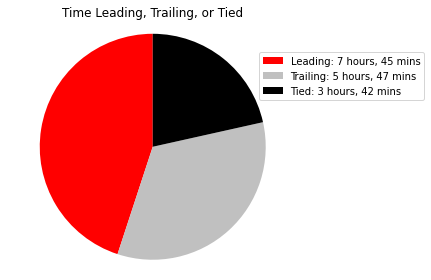

In [22]:
# pie chart with time Xtreme is ahead, losing, or tied 

# psuedo-logic 
# loop through each game, get period length, loop through goals by period, start with period length - time of next goal
# then if tied, winning, or losing add time difference to the total, continue, rinse, repeat
num_games = df_games.shape[0]

time_leading = datetime.timedelta(minutes=0, seconds=0)
time_trailing = datetime.timedelta(minutes=0, seconds=0)
time_tied = datetime.timedelta(minutes=0, seconds=0) 
curr_time = datetime.timedelta(minutes=0, seconds=0) 
a_score = 0 
o_score = 0 

# loop through each game
for g in range(1, num_games+1):

  # reset sores 
  a_score = 0 
  o_score = 0 

  # create a temporary dataframe with just that game 
  df_game_goals = df_goals[(df_goals.game == g)]
  
  # loop through each period 
  for p in range(1,5):
    # dynmically get period length 
    period_length = df_periods[(df_periods.game == g)]["p" + str(p)+ "_length"].iloc[0]
    period_time = datetime.timedelta(minutes=int(period_length), seconds=0)
    df_period_goals = df_game_goals[(df_game_goals.period == p)] 

    # init current time to period length 
    curr_time = period_time

    # only proceed if there was any time  in that period (not always an OT game)
    if (period_length > 0):
      
      # get number of goals in the period 
      num_goals_this_period = df_period_goals.shape[0]

      # if no goals scored that period, just add time on
      if (num_goals_this_period == 0):
        if (a_score == o_score):
          time_tied = time_tied + period_time
        elif (a_score > o_score):
          time_leading = time_leading + period_time
        else: 
          time_trailing = time_trailing + period_time

      else:
        # track number of goals
        goal_counter = 1

        # yes, goals that period so iterate over each goal  
        for idx in df_period_goals.index:

          # get each goal and store time difference from curr_time to time goal scored
          xtime = df_period_goals["time"][idx]
          [m, s] = [int(x) for x in xtime.split(':')]
          time_goal_scored = datetime.timedelta(minutes=m, seconds=s)
          time_diff = curr_time - time_goal_scored
          curr_time = time_goal_scored 

          # decide where to assign the time 
          if (a_score == o_score):
            time_tied = time_tied + time_diff
          elif (a_score > o_score):
            time_leading = time_leading + time_diff
          else: 
            time_trailing = time_trailing + time_diff

          # increment the score 
          if df_period_goals["team"][idx] == "a": 
            a_score = a_score + 1
          else: 
            o_score = o_score + 1

          # if this is the last goal, need to add rest of time in the period
          # print(num_goals_this_period, goal_counter) 
          if (goal_counter == num_goals_this_period):
            if (a_score == o_score):
              time_tied = time_tied + time_goal_scored
            elif (a_score > o_score):
              time_leading = time_leading + time_goal_scored
            else: 
              time_trailing = time_trailing + time_goal_scored

          # increment the counter
          goal_counter = goal_counter + 1

# pretty up the labels
totsec = time_leading.total_seconds()
h = '{0:.0f}'.format(totsec // 3600)
m = '{0:.0f}'.format((totsec % 3600) // 60)
leading_label = "Leading: " + str(h) + " hours, " + str(m) + " mins"

totsec = time_trailing.total_seconds()
h = '{0:.0f}'.format(totsec // 3600)
m = '{0:.0f}'.format((totsec % 3600) // 60)
trailing_label = "Trailing: " + str(h) + " hours, " + str(m) + " mins"

totsec = time_tied.total_seconds()
h = '{0:.0f}'.format(totsec // 3600)
m = '{0:.0f}'.format((totsec % 3600) // 60)
tied_label = "Tied: " + str(h) + " hours, " + str(m) + " mins"

t_values = [time_leading.seconds, time_trailing.seconds, time_tied.seconds]
t_labels = [leading_label, trailing_label, tied_label] 
t_colors = ['#ff0000','#c0c0c0','#000000']

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(t_values, colors = t_colors, pctdistance=1.08, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, t_labels, loc="best", bbox_to_anchor=(.85, .9))
ax1.axis('equal')  
ax1.set_title('Time Leading, Trailing, or Tied')
plt.tight_layout()
plt.show()





*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


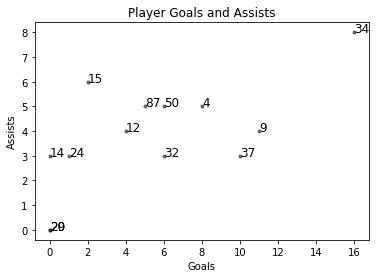

In [23]:
# display goals and assists for each player 

# get data
x = df_player_stats["G"]
y = df_player_stats["A"]
n = df_player_stats["Player"]
colors = (0,0,0)
area = np.pi * 3

#ycol = [1,2,3,4,5,6,7,8,9,10,11,12]

# Plot
plt.scatter(x.values, y.values, s=area, c=colors, alpha=0.5)
plt.title('Player Goals and Assists')
#plt.yticks(ycol)
plt.xlabel('Goals')
plt.ylabel('Assists')

for x, y, n in zip(x, y, n):
    plt.text(x, y, str('{0:.0f}'.format(n)), color="black", fontsize=12)

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



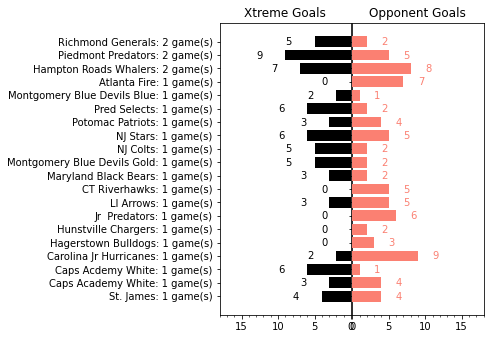

In [24]:
# side-by-side bar charts with goals in each game

# create an empty dataframe
dfx = pd.DataFrame(columns=["clubs", "times",	"x_goals",	"o_goals",])

# get all the unique opponents 
df_games.sort_values("opp", inplace=True, ascending=False)
arr = df_games["opp"].unique()

# loop through 
for o in arr:
  c = df_games[(df_games.opp == o)].count().iloc[0]
  axg = df_games[(df_games.opp == o)].axscore.sum()
  opg = df_games[(df_games.opp == o)].oppscore.sum()
  dfx = dfx.append({'clubs': o + ": " + str(c) + " game(s)", 'times': c, 'x_goals': axg, 'o_goals': opg}, ignore_index=True)  

dfx.sort_values(by=['times'], ascending=True, inplace=True)

y = np.arange(dfx["times"].size)

# extend the size so there's some whitespace to show totals
xtick = range(1, (dfx["x_goals"].max() + 10))

# generate two axes
fig, axes = plt.subplots(ncols=2, sharey=True)

# xtreme 
axes[0].barh(y, dfx["x_goals"], align='center', color='black', zorder=10)
axes[0].set(title="Xtreme Goals")
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=dfx["clubs"])
axes[0].yaxis.tick_left()
axes[0].set_xticks(xtick,xtick)

for i, v in enumerate(dfx["x_goals"]):
    axes[0].text(v + 4, i - .25, str(v), color='black')

# opponent
axes[1].barh(y, dfx["o_goals"], align='center', color='#fb8072', zorder=10)
axes[1].set(title="Opponent Goals")
axes[1].set_xticks(xtick,xtick)

for i, v in enumerate(dfx["o_goals"]):
    axes[1].text(v + 2, i - .25, str(v), color='#fb8072')

fig.tight_layout()
fig.subplots_adjust(wspace=0.01)
fig.set_size_inches(8, 5)

plt.show()


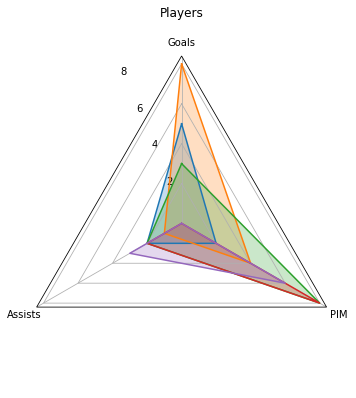

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


data = [['Goals', 'Assists', 'PIM'],
        ('Players', [
            [5, 2, 2],
            [8, 1, 4],
            [3, 2, 8],
            [0, 2, 8],
            [0, 3, 6]])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([2, 4, 6, 8, 10, 12, 14, 16])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()

In [ ]:
p = df_player_stats["Player"].values.tolist()
g = df_player_stats["G"].values.tolist()

#create the color_series for the rosechart
color_series = ["#802200","#B33000","#FF4500","#FAA327","#9ECB3C",
 "#6DBC49","#37B44E","#14ADCF","#209AC9","#1E91CA",
 "#2C6BA0","#2B55A1","#2D3D8E","#44388E","#6A368B",
 "#D02C2A","#D44C2D","#F57A34","#FA8F2F","#D99D21"]
rosechart = Pie(init_opts=opt.InitOpts(width='1350px', height='750px'))
# set the color
rosechart.set_colors(color_series)
# add the data to the rosechart
rosechart.add("", [list(z) for z in zip(p, g)],
        radius=["20%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")
# set the global options for the chart
rosechart.set_global_opts(title_opts=opt.TitleOpts(title="Goals by Player"),
                     legend_opts=opt.LegendOpts(is_show=False),
                     toolbox_opts=opt.ToolboxOpts())
# set the series options
rosechart.set_series_opts(label_opts=opt.LabelOpts(is_show=True, position="inside", font_size=12,formatter="{b}:{c}%", font_style="italic",font_weight="bold", font_family="Century"),)
rosechart.render_notebook()

/usr/local/lib/python3.6/dist-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning:

pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)



In [ ]:
# what is record in second game of a two-game day? 

# values
x_win = 0 
x_loss = 0
x_tie = 0 

# get all the unique dates 
arr = df_games["date"].unique()

# sort by games (ascending)
df_games.sort_values(by=['game'], inplace=True)

# go through each day, find days with two games 
for d in arr:
  count = df_games[(df_games.date == d)].shape[0]
  if (count > 1):
    #print(df_games[(df_games.date == d)])
    series = df_games[(df_games.date == d)].iloc[1:,5:7]
    ax_score = series.values[0,0]
    op_score = series.values[0,1]
    if (ax_score > op_score):
      x_win = x_win + 1
    elif (ax_score < op_score):
      x_loss = x_loss + 1
    else: 
      x_tie = x_tie + 1

    #series = df_games[(df_games.date == d)].iloc[1:,5:7]
    #print(df_games[(df_games.date == d)])
    #print(series)

# track w-l-t for the second game 
print("<b>" + str(x_win) + "-" + str(x_loss) + "-" + str(x_tie) + "</b> in the second game when playing two games on the same day.")



<b>2-4-0</b> in the second game when playing two games on the same day.


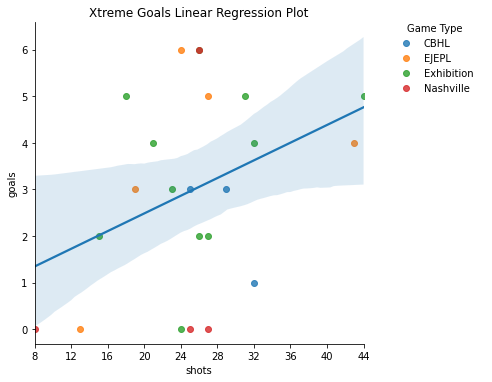

In [29]:
# create a new data frame with totals
dfx = pd.DataFrame(columns=["game",	"goals",	"shots", "location", "league", "goalie"])

# all games 
games = df_games.game

# loop through those games to pull out opponent shots and total up 
for g in games: 
  location = df_games[df_games.game == g].iloc[0,4]
  league = df_games[df_games.game == g].iloc[0,8]
  goalie = df_games[df_games.game == g].iloc[0,7]
  goals = df_games[df_games.game == g].axscore.iloc[0]
  shots = df_shots[df_shots.game == g].ashburn_p1.iloc[0] + df_shots[df_shots.game == g].ashburn_p2.iloc[0] + df_shots[df_shots.game == g].ashburn_p3.iloc[0] + df_shots[df_shots.game == g].ashburn_ot.iloc[0]
  dfx = dfx.append({'game': g, 'goals': float(goals), 'shots': float(shots), 'location': location, 'league': league, 'goalie': goalie} , ignore_index=True)  

dfx.sort_values(by=['league'], inplace=True)

#print(dfx)

graph = sns.lmplot(x='shots', y='goals', hue='league', data=dfx, fit_reg=False, legend_out=True)
ax = sns.regplot(x='shots', y='goals', data=dfx, scatter=False) 

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Xtreme Goals Linear Regression Plot')

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

# title
new_title = 'Game Type'
graph._legend.set_title(new_title)
graph._legend.set_bbox_to_anchor((1.2, .9))
# replace labels
new_labels = ['CBHL', 'EJEPL', 'Exhibition', 'Nashville']
for t, l in zip(graph._legend.texts, new_labels): 
  t.set_text(l)



In [ ]:
# NO LONGER USED # 
# create a motion chart showing goals/assists by player over the games

# roundup function for chart max
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

# create an empty data frame
dfmc = pd.DataFrame(columns=["player",	"game", "goals",	"assists",])

# get a list of players
players = df_goals_assists.player.unique()

# get number of games
num_games = df_games.shape[0]

# loop through each player
for p in players:

  # insert an initial row for the first week as baseline
  goals = df_goals_assists[(df_goals_assists.player == p) & (df_goals_assists.game == 1)].goals.iloc[0]
  if math.isnan(goals):
    goals = 0
  assists = df_goals_assists[(df_goals_assists.player == p) & (df_goals_assists.game == 1)].assists.iloc[0]
  if math.isnan(assists):
    assists = 0
  dfmc = dfmc.append({'player': '{0:.0f}'.format(p), 'game': 1, 'goals': goals, 'assists': assists} , ignore_index=True)  

  # loop through each game
  for g in range(2, num_games+1):
    # save current goals/assists to last week 
    last_week_goals = goals
    last_week_assists = assists

    # for each subsequent week, the total is this week (g) plus last week 
    goals = df_goals_assists[(df_goals_assists.player == p) & (df_goals_assists.game == g)].goals.iloc[0] 
    if not math.isnan(goals):
      goals = goals + last_week_goals
    else:
      goals = last_week_goals
    assists = df_goals_assists[(df_goals_assists.player == p) & (df_goals_assists.game == g)].assists.iloc[0] 
    if not math.isnan(assists):
      assists = assists + last_week_assists
    else:
      assists = last_week_assists
    dfmc = dfmc.append({'player': '{0:.0f}'.format(p), 'game': g, 'goals': goals, 'assists': assists} , ignore_index=True)  

# figure out max goals and assists 
max_goals = roundup(dfmc["goals"].max())
max_assists = roundup(dfmc["assists"].max())

px.scatter(dfmc, x="goals", y="assists", animation_frame="game", animation_group="player",
           color="player", hover_name="player",
           log_x=False, range_x=[0,max_goals], range_y=[0,max_assists])


